# This Dataset is taken from Kaggle Dataset - Womens Clothing Review. 

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from IPython.display import display

In [22]:
df = pd.read_csv(r'C:/Users/PADMANABH BOSAMIA/Documents/Python Scripts/Womens Clothing E-Commerce Reviews.csv/Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [24]:
df[df['Title'].isnull()]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
11,11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses
30,30,1060,33,NaN,Beautifully made pants and on trend with the f...,5,1,0,General Petite,Bottoms,Pants
36,36,1002,29,NaN,This is a comfortable skirt that can span seas...,4,1,5,General,Bottoms,Skirts
38,38,684,36,NaN,Super cute and comfy pull over. sizing is accu...,5,1,2,Initmates,Intimate,Lounge
39,39,862,59,NaN,Great casual top with flare. looks cute with g...,5,1,0,General,Tops,Knits
40,40,862,47,NaN,Pretty and unique. great with jeans or i have ...,4,1,1,General,Tops,Knits
41,41,862,40,NaN,This is a beautiful top. it's unique and not s...,5,1,0,General,Tops,Knits
46,46,862,40,NaN,I love this top. i wear it all the time. the ...,5,1,0,General,Tops,Knits


In [25]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [26]:
df['Title'] = df['Title'].replace('nan',np.NaN)
df['Review Text'] = df['Review Text'].replace('nan',np.NaN)

df.dropna(subset=['Title'], how='all', inplace = True)
df.dropna(subset=['Review Text'], how='all', inplace = True)
df = df[df['Department Name'] != 'General']

In [27]:
mode_division = df['Division Name'].mode()[0]
mode_department = df['Department Name'].mode()[0]
mode_class = df['Class Name'].mode()[0]

df['Division Name'] = df['Division Name'].fillna(mode_division)
df['Department Name'] = df['Department Name'].fillna(mode_division)
df['Class Name'] = df['Class Name'].fillna(mode_division)

In [28]:
df[["Title", "Division Name","Department Name","Class Name","Review Text"]].describe(include=["O"]).T.drop("count",axis=1)

,unique,top,freq
Title,13992,Love it!,136
Division Name,3,General,11677
Department Name,7,Tops,8713
Class Name,21,Dresses,5371
Review Text,19669,Perfect fit and i've gotten so many compliment...,3


In [29]:
sns.set(rc={"font.style":"normal",
            "axes.grid":False,
            'axes.labelsize':25,
            'figure.figsize':(12.0,12.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})

In [30]:
SentAnalyzer = SentimentIntensityAnalyzer()

df['Title'] = df['Title'].astype(str)

df['Polarity Score'] = df['Title'].apply(lambda x:SentAnalyzer.polarity_scores(x)['compound'])

df['Sentiment'] = ''

df.loc[df['Polarity Score'] > 0,'Sentiment'] = 'Positive'

df.loc[df['Polarity Score'] < 0,'Sentiment'] = 'Negative'
df.loc[df['Polarity Score'] == 0,'Sentiment'] = 'Neutral'
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity Score,Sentiment
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.0000,Neutral
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5093,Positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.3182,Positive
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.0000,Neutral
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.5106,Positive


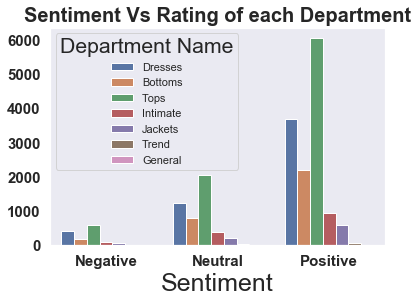

In [34]:
xvar = "Sentiment"
huevar ="Rating"
rowvar =  "Department Name"

sns.countplot(x=xvar,hue=rowvar,data=df,
         order=["Negative","Neutral","Positive"])
plt.title("Sentiment Vs Rating of each Department",fontsize=20,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.ylabel("")
plt.show()

In [35]:
age = pd.cut(df['Age'],bins = [0, 25, 45, 60, 75, 100],labels = ['<=25', '<=45', '<=60', '<=75', '<=100',])
print("Different Age Group Count:")
print(age.value_counts().sort_values())

Different Age Group Count:
<=100      144
<=25       993
<=75      1898
<=60      5679
<=45     10961
Name: Age, dtype: int64


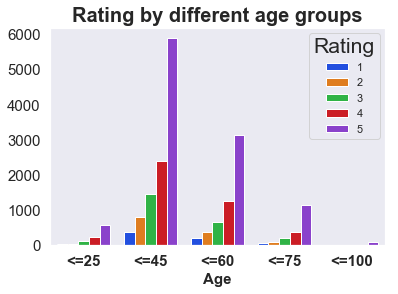

In [36]:
sns.countplot(x=age,hue=df['Rating'], palette = sns.color_palette('bright', 5))
plt.title("Rating by different age groups",fontsize=20,fontweight='bold')
plt.ylabel("")
plt.xlabel('Age',fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.show()

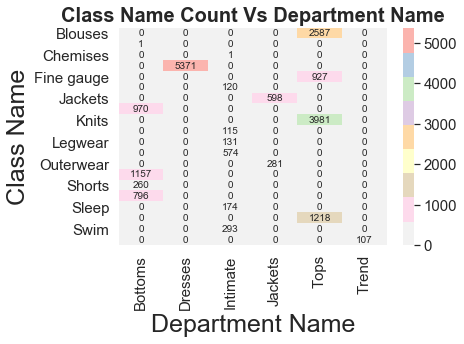

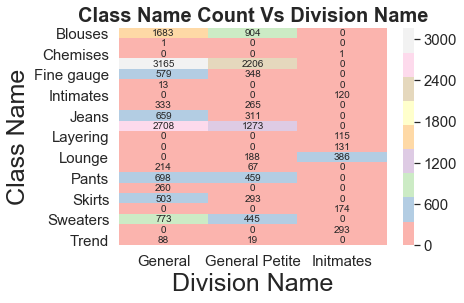

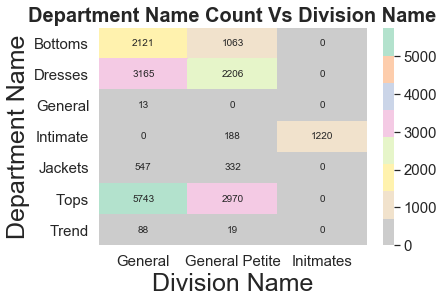

In [37]:
sns.heatmap(pd.crosstab(df['Class Name'], 
        clothes_data["Department Name"]),
            annot=True,fmt='g', cmap="Pastel1_r")
plt.title("Class Name Count Vs Department Name",fontsize=20,fontweight='bold')
plt.show()

sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"]),
            annot=True,fmt='g', cmap="Pastel1")
plt.title("Class Name Count Vs Division Name",fontsize=20,fontweight='bold')

plt.show()

sns.heatmap(pd.crosstab(df['Department Name'], df["Division Name"]),
            annot=True,fmt='g', cmap="Pastel2_r")
plt.title("Department Name Count Vs Division Name",fontsize=20,fontweight='bold')

plt.show()

In [38]:
def wordcloud(text,my_mask=None):
    wordcloud = WordCloud(width=800,height=800,max_words=50,collocations=False,
    min_font_size=10,contour_width=2, contour_color='cadetblue',mask=my_mask,background_color='white').generate(text)

    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis('off')
    plt.show()

def tokenize(text):
    
    stop_words = set(stopwords.words('english'))
    
    token =word_tokenize(text)
    
    word_token = []

    for w in token:
        if w not in stop_words and not w.isdigit() and w.isalnum() :
            word_token.append(str(w))
    
    freq = nltk.FreqDist(word_token)

    new_list = []
    for k,v in freq.items():
        if v >= 2:
            new_list.append(k)
    
    freq.plot(10,cumulative=False)
    plt.show()
    return (str(new_list))

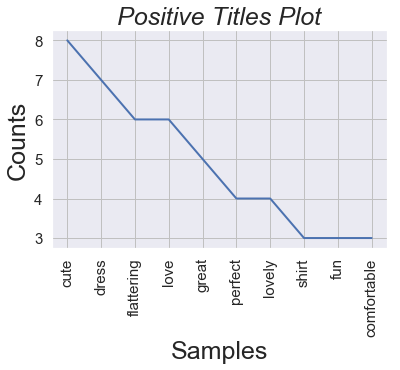

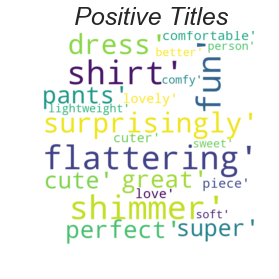

In [39]:
positive = df[(df['Rating'] >3) & 
                        (df['Recommended IND'] ==1) & 
                       (df['Sentiment'] =='Positive')]

plt.title("Positive Titles Plot",fontsize=25,fontstyle='oblique')
ret_text = tokenize(str(positive['Title']).lower())

plt.title("Positive Titles",fontsize=25,fontstyle='oblique')
wordcloud(ret_text)

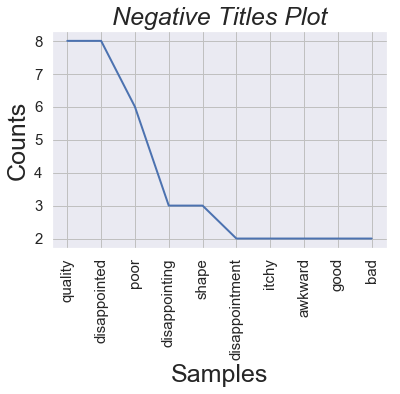

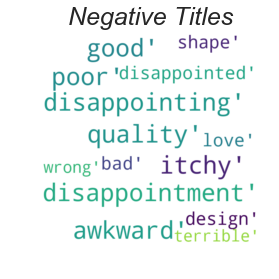

In [40]:
negative = df[(df['Rating'] <=2) & 
                        (df['Recommended IND'] ==0) & 
                       (df['Sentiment'] =='Negative')]

plt.title("Negative Titles Plot",fontsize=25,fontstyle='oblique')
ret_text = tokenize(str(negative['Title']).lower())

plt.title("Negative Titles",fontsize=25,fontstyle='oblique')
wordcloud(ret_text)

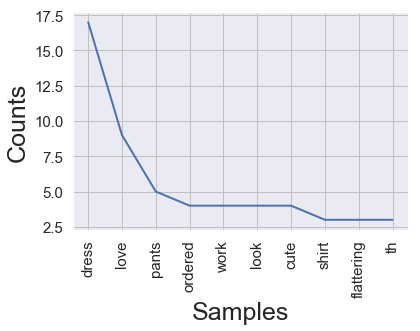

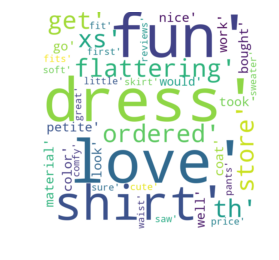

In [41]:
ret_text = tokenize(str(df['Review Text']).lower())
wordcloud(ret_text)